In [3]:
# !pip3 install seaborn
# !pip3 install umap
# !pip3 install kagglehub

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 22.0M/22.0M [00:01<00:00, 16.0MB/s]

Extracting files...


Path to dataset files: /Users/magdalenagradek/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [8]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join
import matplotlib.pyplot as plt

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

In [ ]:
input_path = path
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

In [ ]:
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

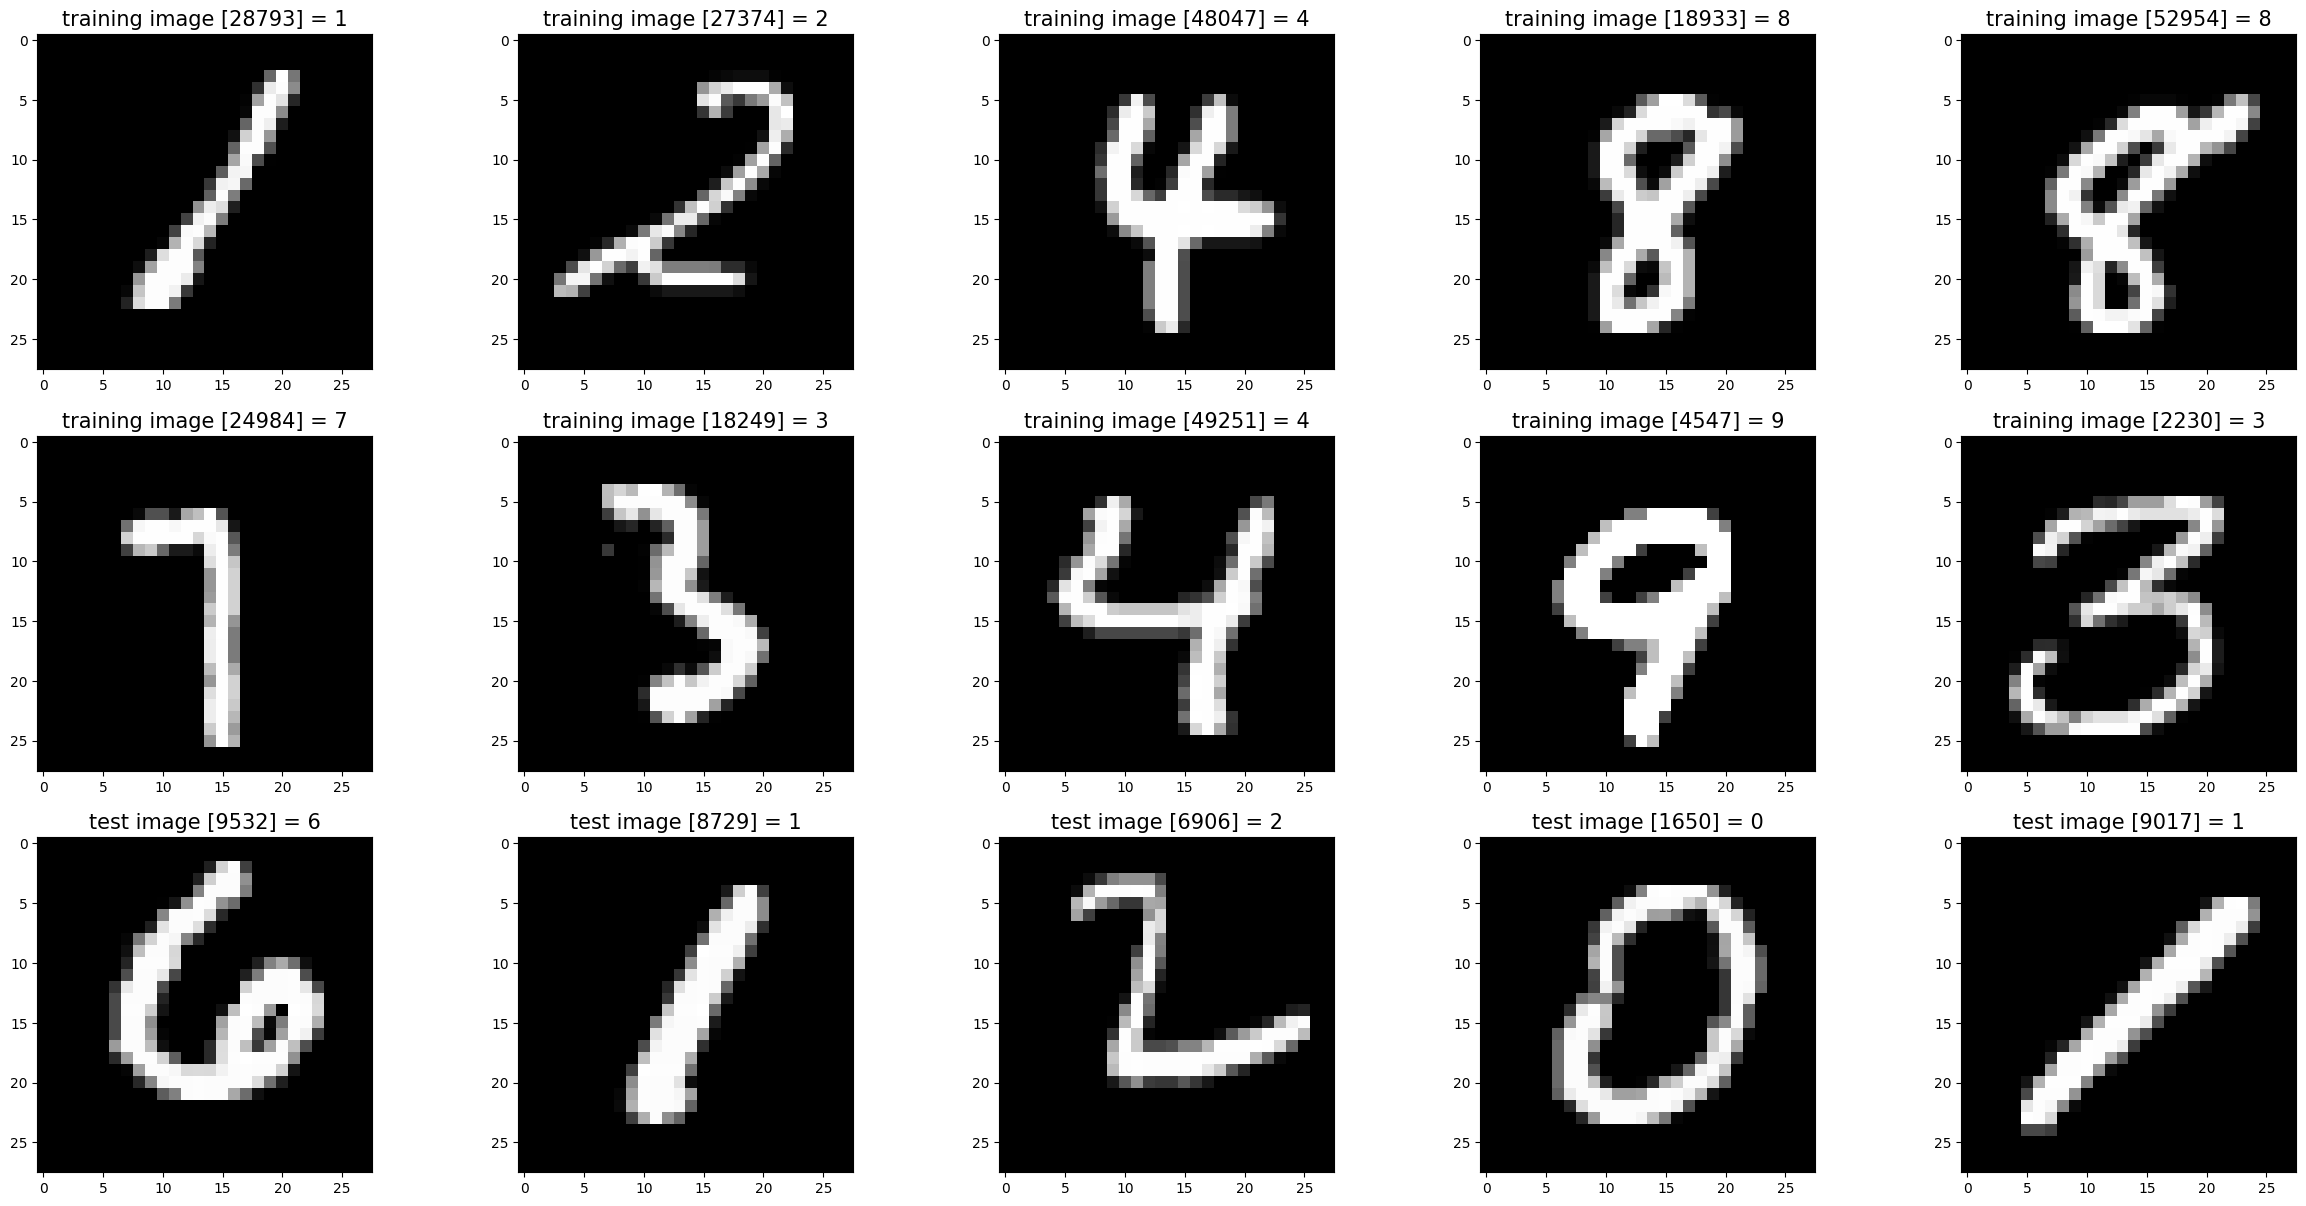

In [ ]:


#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(images_2_show, titles_2_show)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_digits, make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
#from tensorflow.keras.datasets import mnist, fashion_mnist



# 1. IRIS
iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data)


# 2. Digits
digits = load_digits()
X_digits = StandardScaler().fit_transform(digits.data)


# 3. Swiss Roll
X_swiss, t_swiss = make_swiss_roll(n_samples=2000, noise=0.1, random_state=42)


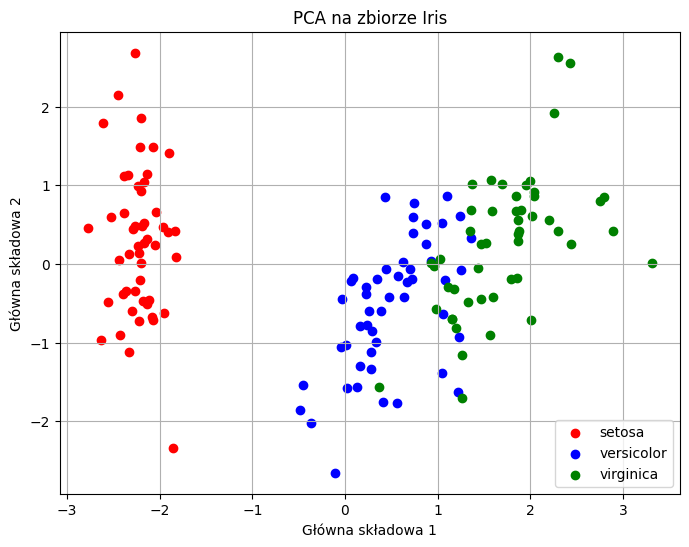

In [ ]:
# PCA na zbiorze Iris
pca = PCA(n_components=2)  # Redukcja do 2 wymiarów
X_iris_pca = pca.fit_transform(X_iris)

# Wizualizacja wyników PCA dla Iris
plt.figure(figsize=(8, 6))
for label, color in zip(np.unique(iris.target), ['red', 'blue', 'green']):
    plt.scatter(X_iris_pca[iris.target == label, 0], X_iris_pca[iris.target == label, 1],
                label=iris.target_names[label], color=color)
plt.xlabel("Główna składowa 1")
plt.ylabel("Główna składowa 2")
plt.title("PCA na zbiorze Iris")
plt.legend()
plt.grid()
plt.show()

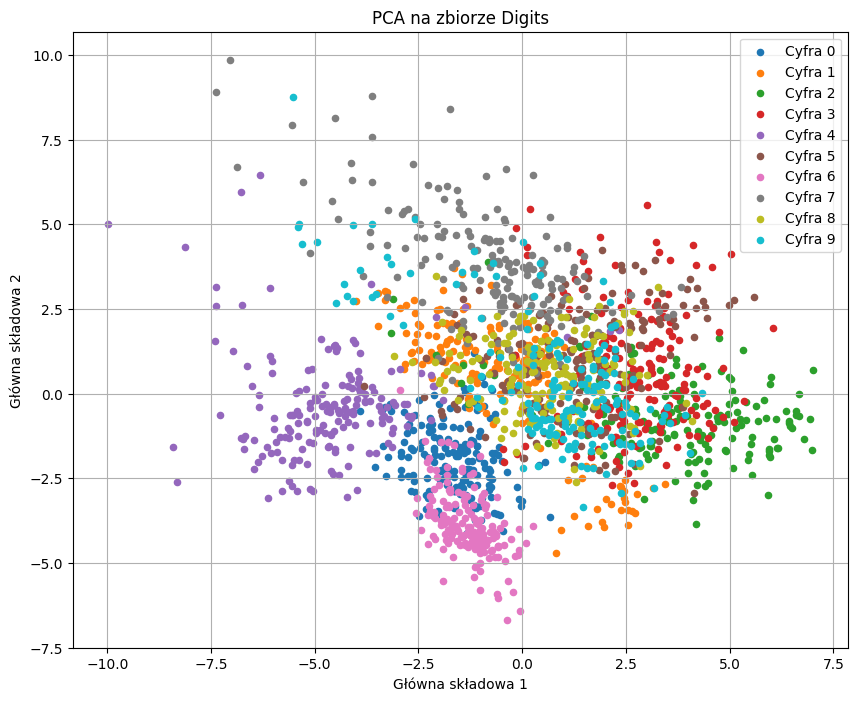

In [ ]:
# PCA na zbiorze Digits
pca_digits = PCA(n_components=2)  # Redukcja do 2 wymiarów
X_digits_pca = pca_digits.fit_transform(X_digits)

# Wizualizacja wyników PCA dla Digits
plt.figure(figsize=(10, 8))
for label in np.unique(digits.target):
    plt.scatter(X_digits_pca[digits.target == label, 0], X_digits_pca[digits.target == label, 1],
                label=f'Cyfra {label}', s=20)
plt.xlabel("Główna składowa 1")
plt.ylabel("Główna składowa 2")
plt.title("PCA na zbiorze Digits")
plt.legend()
plt.grid()
plt.show()


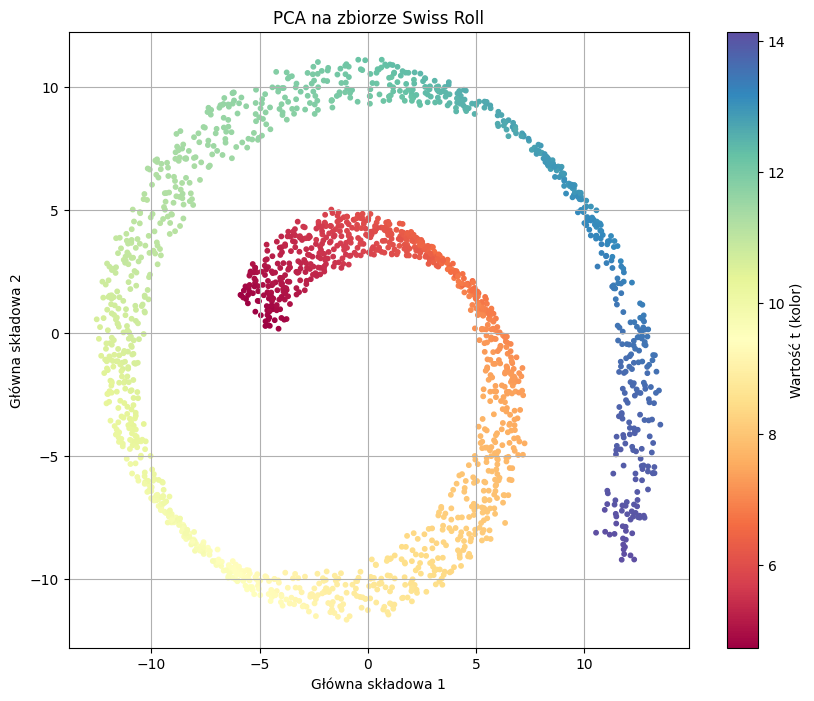

In [ ]:
# PCA na zbiorze Swiss Roll
pca_swiss = PCA(n_components=2)  # Redukcja do 2 wymiarów
X_swiss_pca = pca_swiss.fit_transform(X_swiss)

# Wizualizacja wyników PCA dla Swiss Roll
plt.figure(figsize=(10, 8))
plt.scatter(X_swiss_pca[:, 0], X_swiss_pca[:, 1], c=t_swiss, cmap='Spectral', s=10)
plt.colorbar(label="Wartość t (kolor)")
plt.xlabel("Główna składowa 1")
plt.ylabel("Główna składowa 2")
plt.title("PCA na zbiorze Swiss Roll")
plt.grid()
plt.show()


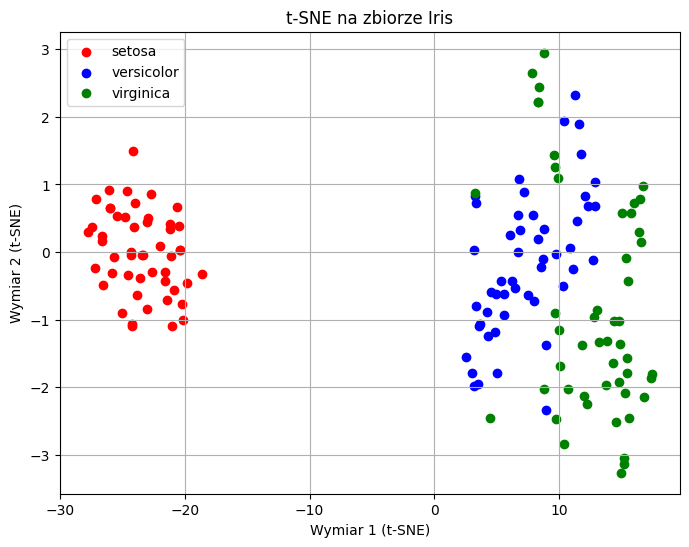

In [ ]:
# t-SNE na zbiorze Iris
tsne = TSNE(n_components=2, random_state=42)  # Redukcja do 2 wymiarów
X_iris_tsne = tsne.fit_transform(X_iris)

# Wizualizacja wyników t-SNE dla Iris
plt.figure(figsize=(8, 6))
for label, color in zip(np.unique(iris.target), ['red', 'blue', 'green']):
    plt.scatter(X_iris_tsne[iris.target == label, 0], X_iris_tsne[iris.target == label, 1],
                label=iris.target_names[label], color=color)
plt.xlabel("Wymiar 1 (t-SNE)")
plt.ylabel("Wymiar 2 (t-SNE)")
plt.title("t-SNE na zbiorze Iris")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


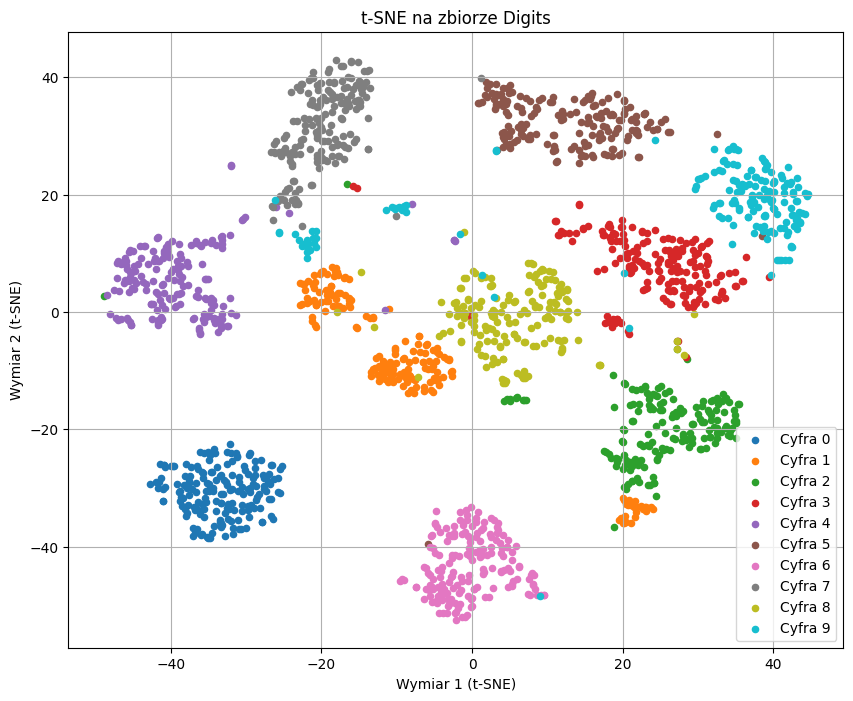

In [ ]:
# t-SNE na zbiorze Digits
tsne_digits = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)  # Redukcja do 2 wymiarów
X_digits_tsne = tsne_digits.fit_transform(X_digits)

# Wizualizacja wyników t-SNE dla Digits
plt.figure(figsize=(10, 8))
for label in np.unique(digits.target):
    plt.scatter(X_digits_tsne[digits.target == label, 0], X_digits_tsne[digits.target == label, 1],
                label=f'Cyfra {label}', s=20)
plt.xlabel("Wymiar 1 (t-SNE)")
plt.ylabel("Wymiar 2 (t-SNE)")
plt.title("t-SNE na zbiorze Digits")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


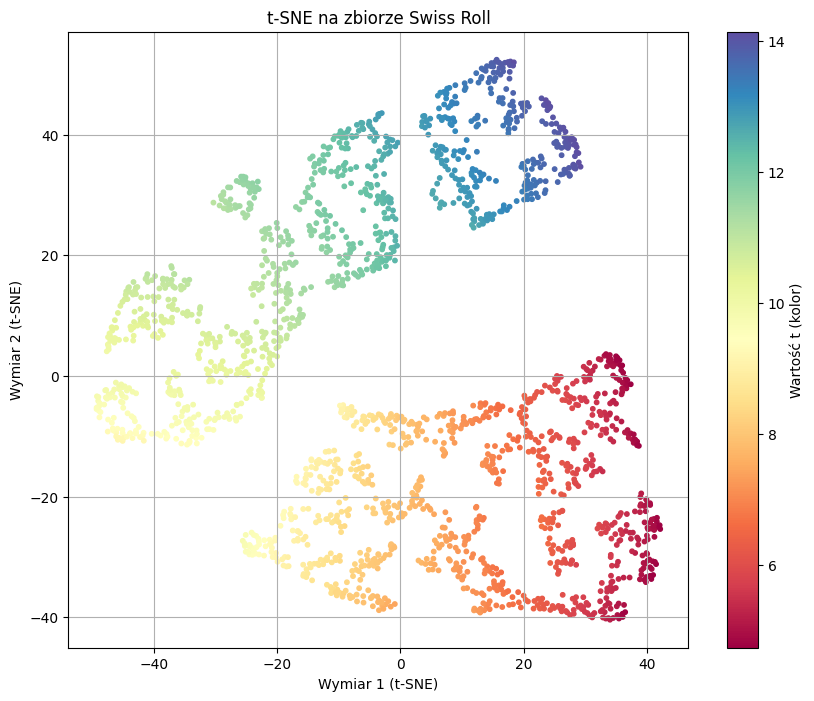

In [ ]:
# t-SNE na zbiorze Swiss Roll
tsne_swiss = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)  # Redukcja do 2 wymiarów
X_swiss_tsne = tsne_swiss.fit_transform(X_swiss)

# Wizualizacja wyników t-SNE dla Swiss Roll
plt.figure(figsize=(10, 8))
plt.scatter(X_swiss_tsne[:, 0], X_swiss_tsne[:, 1], c=t_swiss, cmap='Spectral', s=10)
plt.colorbar(label="Wartość t (kolor)")
plt.xlabel("Wymiar 1 (t-SNE)")
plt.ylabel("Wymiar 2 (t-SNE)")
plt.title("t-SNE na zbiorze Swiss Roll")
plt.grid()
plt.show()


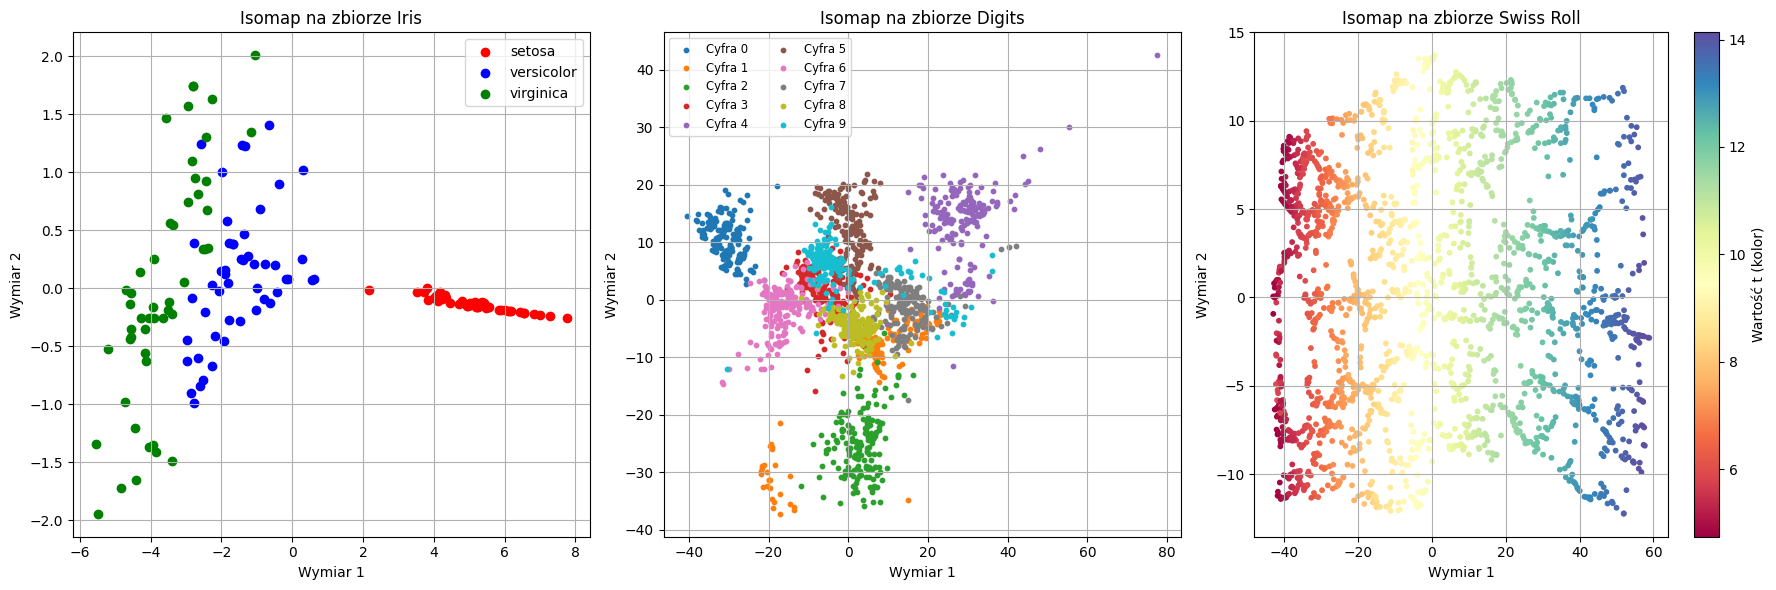

In [ ]:
from sklearn.manifold import Isomap

# Isomap dla Iris
isomap_iris = Isomap(n_components=2)
X_iris_isomap = isomap_iris.fit_transform(X_iris)

# Isomap dla Digits
isomap_digits = Isomap(n_components=2)
X_digits_isomap = isomap_digits.fit_transform(X_digits)

# Isomap dla Swiss Roll
isomap_swiss = Isomap(n_components=2)
X_swiss_isomap = isomap_swiss.fit_transform(X_swiss)

# Rysunek z podwykresami
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Iris
for label, color in zip(np.unique(iris.target), ['red', 'blue', 'green']):
    axes[0].scatter(X_iris_isomap[iris.target == label, 0], X_iris_isomap[iris.target == label, 1],
                    label=iris.target_names[label], color=color)
axes[0].set_title("Isomap na zbiorze Iris")
axes[0].set_xlabel("Wymiar 1")
axes[0].set_ylabel("Wymiar 2")
axes[0].legend()
axes[0].grid()

# Digits
for label in np.unique(digits.target):
    axes[1].scatter(X_digits_isomap[digits.target == label, 0], X_digits_isomap[digits.target == label, 1],
                    label=f'Cyfra {label}', s=10)
axes[1].set_title("Isomap na zbiorze Digits")
axes[1].set_xlabel("Wymiar 1")
axes[1].set_ylabel("Wymiar 2")
axes[1].legend(ncol=2, fontsize='small')
axes[1].grid()

# Swiss Roll
scatter = axes[2].scatter(X_swiss_isomap[:, 0], X_swiss_isomap[:, 1], c=t_swiss, cmap='Spectral', s=10)
axes[2].set_title("Isomap na zbiorze Swiss Roll")
axes[2].set_xlabel("Wymiar 1")
axes[2].set_ylabel("Wymiar 2")
fig.colorbar(scatter, ax=axes[2], label="Wartość t (kolor)")
axes[2].grid()

# Dopasowanie layoutu
plt.tight_layout()
plt.show()


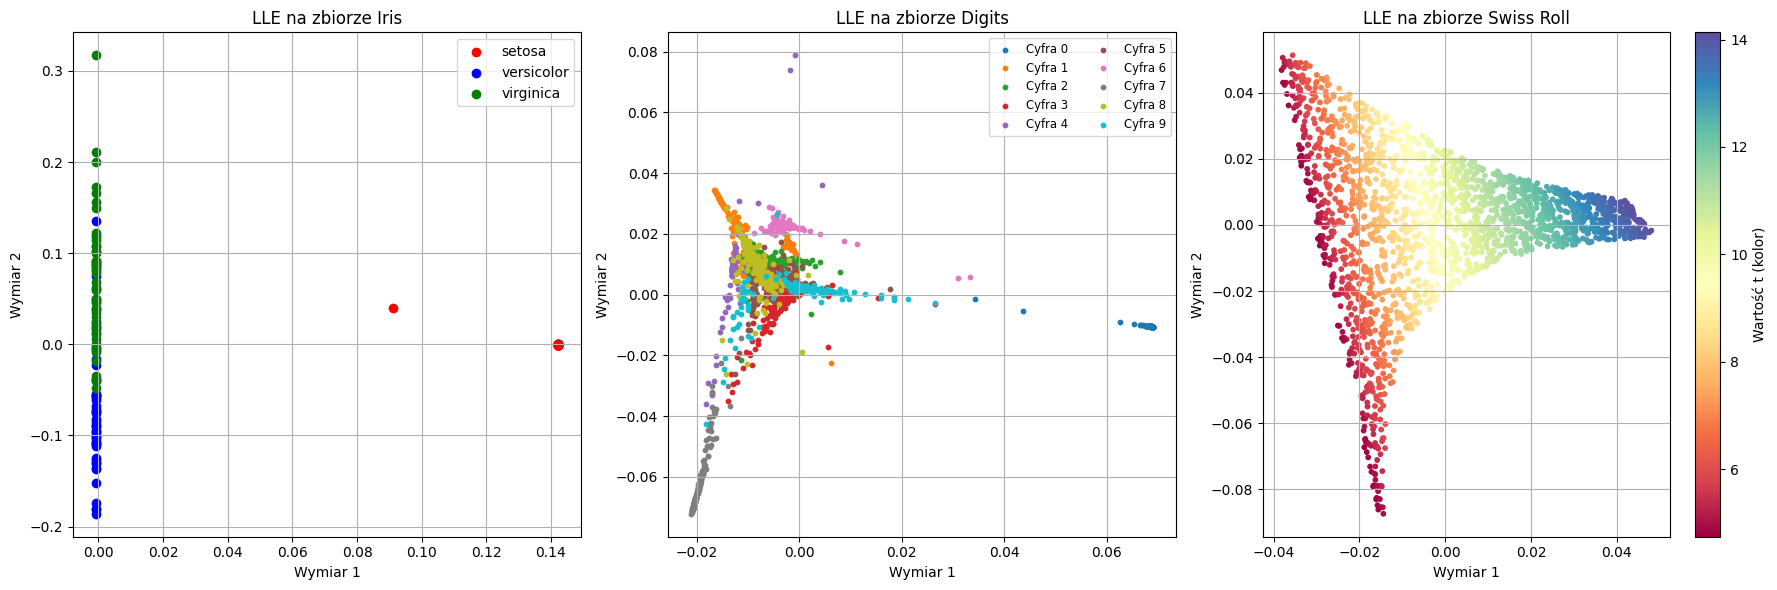

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

# LLE dla Iris
lle_iris = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_iris_lle = lle_iris.fit_transform(X_iris)

# LLE dla Digits
lle_digits = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_digits_lle = lle_digits.fit_transform(X_digits)

# LLE dla Swiss Roll
lle_swiss = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_swiss_lle = lle_swiss.fit_transform(X_swiss)

# Rysunek z podwykresami
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Iris
for label, color in zip(np.unique(iris.target), ['red', 'blue', 'green']):
    axes[0].scatter(X_iris_lle[iris.target == label, 0], X_iris_lle[iris.target == label, 1],
                    label=iris.target_names[label], color=color)
axes[0].set_title("LLE na zbiorze Iris")
axes[0].set_xlabel("Wymiar 1")
axes[0].set_ylabel("Wymiar 2")
axes[0].legend()
axes[0].grid()

# Digits
for label in np.unique(digits.target):
    axes[1].scatter(X_digits_lle[digits.target == label, 0], X_digits_lle[digits.target == label, 1],
                    label=f'Cyfra {label}', s=10)
axes[1].set_title("LLE na zbiorze Digits")
axes[1].set_xlabel("Wymiar 1")
axes[1].set_ylabel("Wymiar 2")
axes[1].legend(ncol=2, fontsize='small')
axes[1].grid()

# Swiss Roll
scatter = axes[2].scatter(X_swiss_lle[:, 0], X_swiss_lle[:, 1], c=t_swiss, cmap='Spectral', s=10)
axes[2].set_title("LLE na zbiorze Swiss Roll")
axes[2].set_xlabel("Wymiar 1")
axes[2].set_ylabel("Wymiar 2")
fig.colorbar(scatter, ax=axes[2], label="Wartość t (kolor)")
axes[2].grid()

# Dopasowanie layoutu
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs val

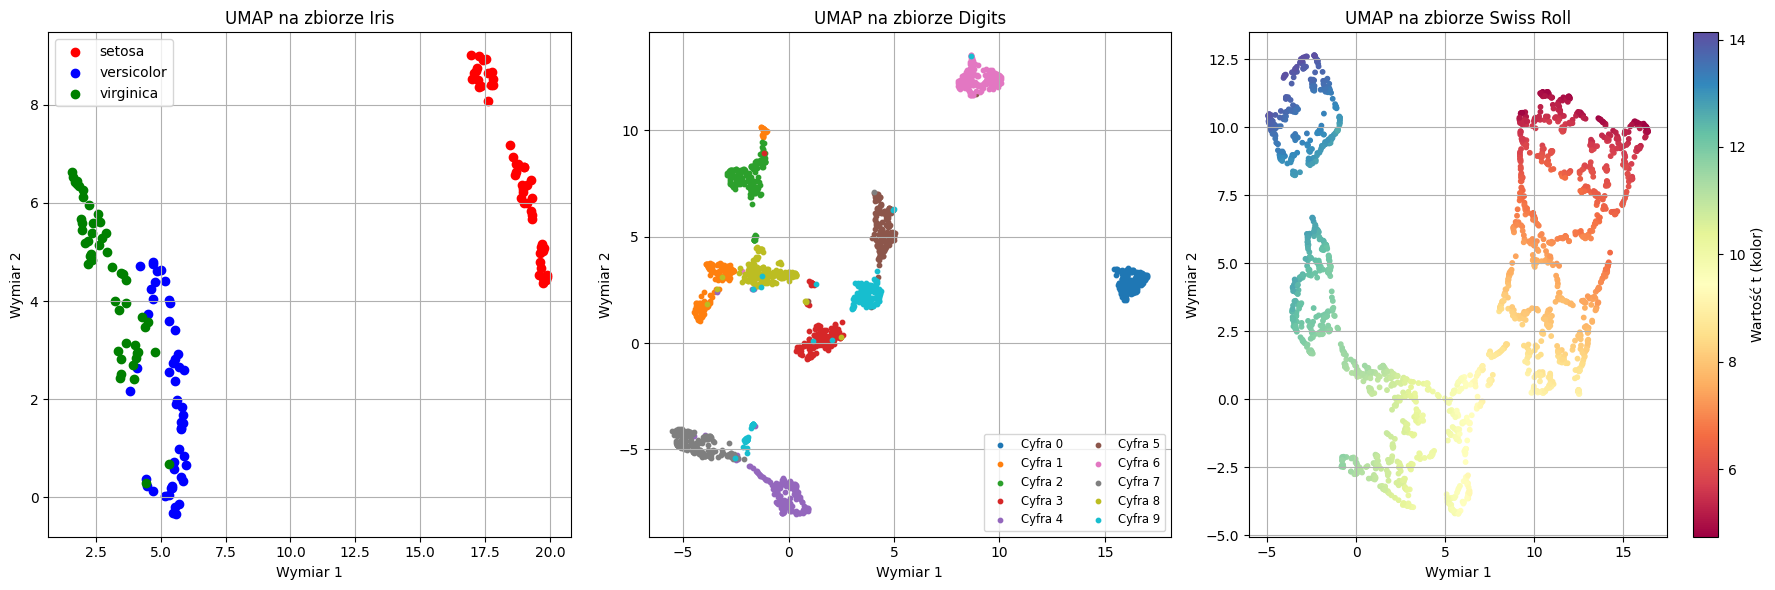

In [ ]:

# UMAP dla Iris
umap_iris = umap.UMAP(n_components=2, random_state=42)
X_iris_umap = umap_iris.fit_transform(X_iris)

# UMAP dla Digits
umap_digits = umap.UMAP(n_components=2, random_state=42)
X_digits_umap = umap_digits.fit_transform(X_digits)

# UMAP dla Swiss Roll
umap_swiss = umap.UMAP(n_components=2, random_state=42)
X_swiss_umap = umap_swiss.fit_transform(X_swiss)

# Rysunek z podwykresami
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Iris
for label, color in zip(np.unique(iris.target), ['red', 'blue', 'green']):
    axes[0].scatter(X_iris_umap[iris.target == label, 0], X_iris_umap[iris.target == label, 1],
                    label=iris.target_names[label], color=color)
axes[0].set_title("UMAP na zbiorze Iris")
axes[0].set_xlabel("Wymiar 1")
axes[0].set_ylabel("Wymiar 2")
axes[0].legend()
axes[0].grid()

# Digits
for label in np.unique(digits.target):
    axes[1].scatter(X_digits_umap[digits.target == label, 0], X_digits_umap[digits.target == label, 1],
                    label=f'Cyfra {label}', s=10)
axes[1].set_title("UMAP na zbiorze Digits")
axes[1].set_xlabel("Wymiar 1")
axes[1].set_ylabel("Wymiar 2")
axes[1].legend(ncol=2, fontsize='small')
axes[1].grid()

# Swiss Roll
scatter = axes[2].scatter(X_swiss_umap[:, 0], X_swiss_umap[:, 1], c=t_swiss, cmap='Spectral', s=10)
axes[2].set_title("UMAP na zbiorze Swiss Roll")
axes[2].set_xlabel("Wymiar 1")
axes[2].set_ylabel("Wymiar 2")
fig.colorbar(scatter, ax=axes[2], label="Wartość t (kolor)")
axes[2].grid()

# Dopasowanie layoutu
plt.tight_layout()
plt.show()


In [ ]:
# Wczytanie danych
import pandas as pd

df = pd.read_csv('/content/mammoth_a.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/mammoth_a.csv'